In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

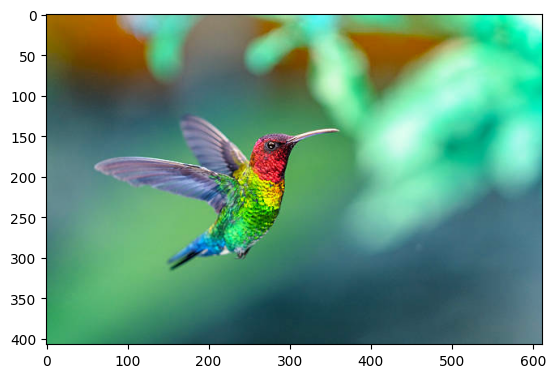

In [4]:
image=cv2.imread('bird.jpg')


plt.imshow(image)

In [57]:
# Plotting multiple chart at one go

def plot_image(list_images,name_list=None,fig_size=(15,12),horizontal=True,cmap='viridis'):
    l=len(list_images)
    plt.figure(figsize=fig_size,dpi=100)
    for i,j in enumerate(list_images):
        if horizontal:
#            plt.subplot(int('1'+str(l)+str(i+1)))
            plt.subplot(1,l,i+1)
            plt.title(name_list[i])
            plt.axis('off')
            plt.imshow(j,cmap=cmap)
        else:
#            plt.subplot(int(str(l)+'1'+str(i+1)))
            plt.subplot(l,1,i+1)
            plt.title(name_list[i])
            plt.axis('off')
            plt.imshow(j,cmap=cmap)

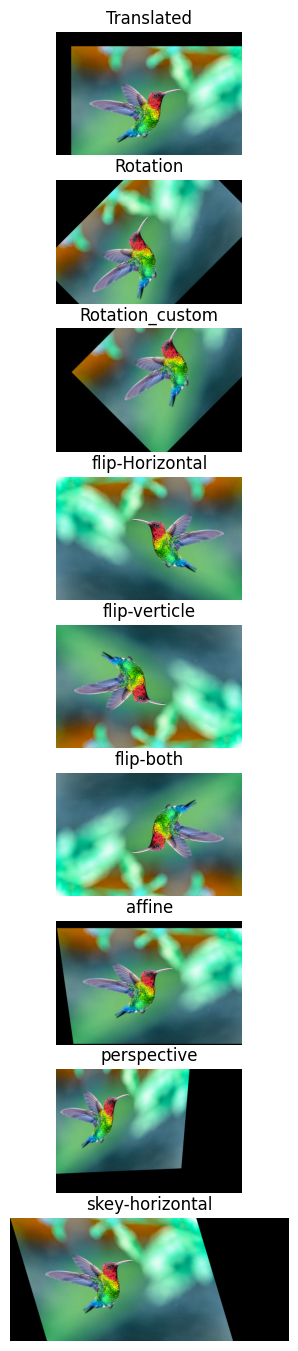

In [61]:

# Translation
tx=50
ty=50
h,w=image.shape[:2]
M_translate=np.float32([[1,0,tx],[0,1,ty]])
translated=cv2.warpAffine(image,M_translate,(w,h))

# Rotation

center=(w//2,h//2)
angle=45
M_rotation=cv2.getRotationMatrix2D(center,angle,1.0)
rotation=cv2.warpAffine(image,M_rotation,(w,h))


# Rotate about custom point
custom_center=(200,10)
M_rotation_custom=cv2.getRotationMatrix2D(custom_center,angle,1.0)
rotation_custom=cv2.warpAffine(image,M_rotation_custom,(w,h))

# Scalling

scale_up=cv2.resize(image,None,fx=3,fy=3,interpolation=cv2.INTER_NEAREST)
scale_down=cv2.resize(image,None,fx=0.1,fy=0.1,interpolation=cv2.INTER_CUBIC)
resize=cv2.resize(image,(1000,1000),interpolation=cv2.INTER_CUBIC)

# FLip
flip_horizontal=cv2.flip(image,1)
flip_verticle=cv2.flip(image,0)
flip_both=cv2.flip(image,-1)


# Affine Transformation
# Use 3 points to simulate perspective correction

pts1=np.float32([[50,50],[200,50],[50,200]])
pts2=np.float32([[60,70],[210,70],[80,210]])
M_affine=cv2.getAffineTransform(pts1,pts2)
affine=cv2.warpAffine(image,M_affine,(w,h))

# Perspective transformation
# Use 4 points to simulate perspective correction
pts_src = np.float32([[50, 50], [w - 50, 70], [30, h - 50], [w - 20, h - 30]])
pts_dst = np.float32([[0, 0], [400, 0], [0, 300], [400, 300]])
M_perspective=cv2.getPerspectiveTransform(pts_src,pts_dst)
perspective=cv2.warpPerspective(image,M_perspective,(w,h))


# Skew  via affine
# horizontal skew
skew_matrix=np.float32([[1,0.3,0],[0,1.0,0]])

skey_h=cv2.warpAffine(image,skew_matrix,(int(w*1.5),h))

plot=[translated,rotation,rotation_custom,flip_horizontal,flip_verticle,flip_both,affine,perspective,skey_h]
name_list=['Translated','Rotation','Rotation_custom','flip-Horizontal','flip-verticle','flip-both','affine','perspective','skey-horizontal']
plot_image(plot,name_list,fig_size=(20,17),horizontal=False)
